In [1]:
import yfinance as yf
import matplotlib as plt
import numpy as np
import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import  risk_models
from pypfopt import expected_returns
import datetime as datetime
df=pd.read_html('https://en.wikipedia.org/wiki/List_of_S&P_500_companies')[0]


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

ImportError: numpy.core.multiarray failed to import

In [2]:
tickers=df.Symbol.to_list()

In [3]:
len(tickers)

505

In [4]:
df2=yf.download(tickers,start='2010-12-31',end='2021-03-22')

[**********************89%******************     ]  447 of 505 completed

KeyboardInterrupt: 

In [5]:
df2.to_csv('S&P_500_Stock_Prices.csv')

NameError: name 'df2' is not defined

[*********************100%***********************]  504 of 505 completed

In [2]:
prices=pd.read_csv('S&P_500_Stock_Prices - Copy.csv')

In [3]:
prices=prices.set_index('Date')

In [4]:
# prices.loc[1000:505]
prices.shape

(2570, 455)

In [5]:
# Calculate expected returns and sample covariance
# mu=expected_returns.mean_historical_return(prices, returns_data=False, compounding=True, frequency=252)
mu = expected_returns.mean_historical_return(prices)
S = risk_models.sample_cov(prices)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)



NameError: name 'expected_returns' is not defined

In [7]:
mu

A       0.158041
AAL     0.093485
AAP     0.110962
AAPL    0.274973
ABC     0.144707
          ...   
XRAY    0.065317
YUM     0.137964
ZBH     0.119158
ZBRA    0.276449
ZION    0.096668
Length: 455, dtype: float64

In [8]:
raw_weights = ef.max_sharpe()

In [9]:
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file("weights.csv")  # saves to file
# print(cleaned_weights)
ef.portfolio_performance(verbose=True)

Expected annual return: 34.9%
Annual volatility: 18.2%
Sharpe Ratio: 1.81


(0.3488342159282294, 0.18203807637975086, 1.8064034869399854)

In [10]:
print(asd)

NameError: name 'asd' is not defined

In [11]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [12]:
portfolio_val=5000
latest_prices=get_latest_prices(prices)
weights=cleaned_weights


In [13]:
import cvxpy; cvxpy.installed_solvers()

['CVXOPT', 'ECOS', 'ECOS_BB', 'GLPK', 'GLPK_MI', 'OSQP', 'SCS']

In [14]:
da=DiscreteAllocation(weights,latest_prices,total_portfolio_value=portfolio_val)
allocation, leftover = da.lp_portfolio()
print('DiscreteAllocation',allocation) 
print('Funds Remaining',leftover)

DiscreteAllocation {'ABMD': 1, 'CHTR': 1, 'DPZ': 3, 'EXR': 2, 'GNRC': 1, 'LLY': 1, 'MKTX': 1, 'NEE': 5, 'TSLA': 1, 'TYL': 1, 'WST': 1}
Funds Remaining 20.35000609999952


In [15]:
import requests
def get_company_name(symbol):
    url='http://d.yimg.com/autoc.finance.yahoo.com/autoc?query='+symbol+'&region=1&lang=en'
    result = requests.get(url).json()
    for r in result['ResultSet']['Result']:
        if r['symbol']==symbol:
            return r['name']


In [16]:
company_name=[]
discrete_allocation_list=[]
for symbol in allocation:
    discrete_allocation_list.append(allocation.get(symbol))    
    company_name.append(get_company_name(symbol))
print(company_name)

['Abiomed, Inc.', 'Charter Communications, Inc.', "Domino's Pizza, Inc.", 'Extra Space Storage Inc.', 'Generac Holdings Inc.', 'Eli Lilly and Company', 'MarketAxess Holdings Inc.', 'NextEra Energy, Inc.', 'Tesla, Inc.', 'Tyler Technologies, Inc.', 'West Pharmaceutical Services, Inc.']


In [17]:
portfolio_df=pd.DataFrame(columns=['Company_Name','Company_Ticker','Discrete_Val_'+str(portfolio_val)])
portfolio_df['Company_Name']=company_name
portfolio_df['Company_Ticker']=allocation
portfolio_df['Discrete_Val_'+str(portfolio_val)]=discrete_allocation_list

In [18]:
portfolio_df

,Company_Name,Company_Ticker,Discrete_Val_5000
0,"Abiomed, Inc.",ABMD,1
1,"Charter Communications, Inc.",CHTR,1
2,"Domino's Pizza, Inc.",DPZ,3
3,Extra Space Storage Inc.,EXR,2
4,Generac Holdings Inc.,GNRC,1
5,Eli Lilly and Company,LLY,1
6,MarketAxess Holdings Inc.,MKTX,1
7,"NextEra Energy, Inc.",NEE,5
8,"Tesla, Inc.",TSLA,1
9,"Tyler Technologies, Inc.",TYL,1


([<matplotlib.axis.XTick at 0x1fa1a829370>,
 [Text(0, 0, 'Abiomed, Inc.'),
  Text(1, 0, 'Charter Communications, Inc.'),
  Text(2, 0, "Domino's Pizza, Inc."),
  Text(3, 0, 'Extra Space Storage Inc.'),
  Text(4, 0, 'Generac Holdings Inc.'),
  Text(5, 0, 'Eli Lilly and Company'),
  Text(6, 0, 'MarketAxess Holdings Inc.'),
  Text(7, 0, 'NextEra Energy, Inc.'),
  Text(8, 0, 'Tesla, Inc.'),
  Text(9, 0, 'Tyler Technologies, Inc.'),
  Text(10, 0, 'West Pharmaceutical Services, Inc.')])

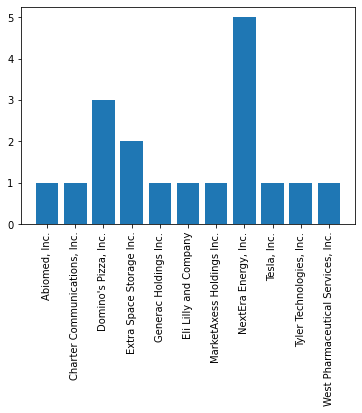

In [64]:
import matplotlib.pyplot as plt
CompanyName = portfolio_df['Company_Name']
Shares = portfolio_df[('Discrete_Val_5000')]

y_pos = range(len(CompanyName))
plt.bar(y_pos, Shares)

plt.xticks(y_pos, CompanyName, rotation=90)




In [55]:
CompanyName = portfolio_df['Company_Name']
Shares = portfolio_df[('Discrete_Val_5000')]

x = portfolio_df['Company_Name']
y = df['sales']
tickvalues = range(0,len(x)) // or tickvalues = df.index
plt.figure(figsize = (20,5))
plt.xticks(ticks = tickvalues ,labels = labellist, rotation = 'vertical')
plt.plot(x,y)

range(0, 3)